In [1]:
%reload_ext pytriqs.magic

# Manipulate the TRIQS Green function

In [2]:
%%triqs             
#include <triqs/gfs.hpp>
using namespace triqs;
using namespace triqs::gfs;
        
gf<imfreq> demo(double beta) {

 int n_freq = 1000;

 clef::placeholder<0> iw_;

 // Construction of a 1x1 matrix-valued fermionic gf on Matsubara frequencies.
 auto g_iw = gf<imfreq>{{beta, Fermion, n_freq}, {1, 1}};

 // Automatic placeholder evaluation
 g_iw(iw_) << 1 / (iw_ + 2);

 // Writing the Green's functions into an HDF5 file.
 auto f = h5::file("gf.h5", 'w');
 h5_write(f, "g_iw", g_iw);

 return g_iw;
}

Let us try it ...

In [3]:
!rm gf.h5
g = demo(10.0)

In [4]:
!h5ls -r gf.h5

/                        Group
/g_iw                    Group
/g_iw/data               Dataset {1000, 1, 1, 2}
/g_iw/indices            Group
/g_iw/indices/left       Dataset {1}
/g_iw/indices/right      Dataset {1}
/g_iw/mesh               Group
/g_iw/mesh/domain        Group
/g_iw/mesh/domain/beta   Dataset {SCALAR}
/g_iw/mesh/domain/statistic Dataset {SCALAR}
/g_iw/mesh/positive_freq_only Dataset {SCALAR}
/g_iw/mesh/size          Dataset {SCALAR}
/g_iw/singularity        Group
/g_iw/singularity/data   Dataset {11, 1, 1, 2}
/g_iw/singularity/omin   Dataset {SCALAR}


/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


(0, 10)

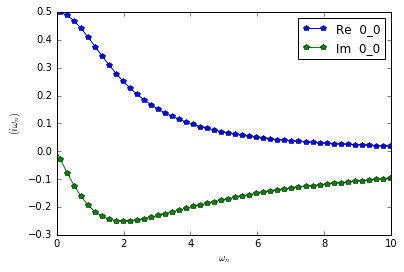

In [5]:
from pytriqs.gf import *
from pytriqs.archive import *
from pytriqs.plot.mpl_interface import oplot, oplotr
import matplotlib.pyplot as plt
%matplotlib inline
#with HDFArchive("gf.h5",'r') as A:  # Open file
#  oplot(A['g_iw'], '-o')
oplot(demo(30), '-p')
plt.xlim(0,10)
#plt.ylim(-0.5,0)